# Install and Import Dependencies

In [1]:
#installation via anaconda prompt with command : conda install -c conda-forge fbprophet

In [3]:
import pandas as pd
from prophet import Prophet

# Read in Data and Process Dates

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [6]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [7]:
print (df['Product'].unique())
print (df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [8]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [9]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+ '-'+df['Month']+'-'+df['Day'])

In [10]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [11]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [12]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Train Model

In [13]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# Forecast Away

In [14]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.006963,767.183205,4034.507101,3040.006963,3040.006963,-647.888820,-647.888820,-647.888820,461.953435,...,16.646822,16.646822,16.646822,-1126.489078,-1126.489078,-1126.489078,0.0,0.0,0.0,2392.118143
1,2018-01-02,3040.816030,831.113272,4026.951902,3040.816030,3040.816030,-657.897028,-657.897028,-657.897028,461.953435,...,-11.256570,-11.256570,-11.256570,-1108.593894,-1108.593894,-1108.593894,0.0,0.0,0.0,2382.919002
2,2018-01-03,3041.625097,741.129081,3991.662535,3041.625097,3041.625097,-631.942788,-631.942788,-631.942788,461.953435,...,-4.385047,-4.385047,-4.385047,-1089.511176,-1089.511176,-1089.511176,0.0,0.0,0.0,2409.682309
3,2018-01-04,3042.434164,939.559910,4007.575414,3042.434164,3042.434164,-584.903499,-584.903499,-584.903499,461.953435,...,22.462384,22.462384,22.462384,-1069.319318,-1069.319318,-1069.319318,0.0,0.0,0.0,2457.530666
4,2018-01-05,3043.243232,766.136267,3930.201220,3043.243232,3043.243232,-620.792973,-620.792973,-620.792973,461.953435,...,-34.596989,-34.596989,-34.596989,-1048.149420,-1048.149420,-1048.149420,0.0,0.0,0.0,2422.450258


In [15]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2392.118143
1,2018-01-02,2382.919002
2,2018-01-03,2409.682309
3,2018-01-04,2457.530666
4,2018-01-05,2422.450258
...,...,...
1175,2021-03-22,3720.780493
1176,2021-03-23,3704.392948
1177,2021-03-24,3720.000814
1178,2021-03-25,3752.221568


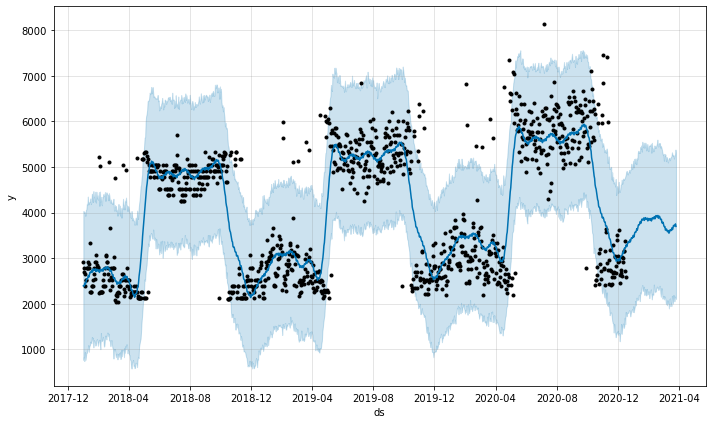

In [16]:
plot1 = m.plot(forecast)

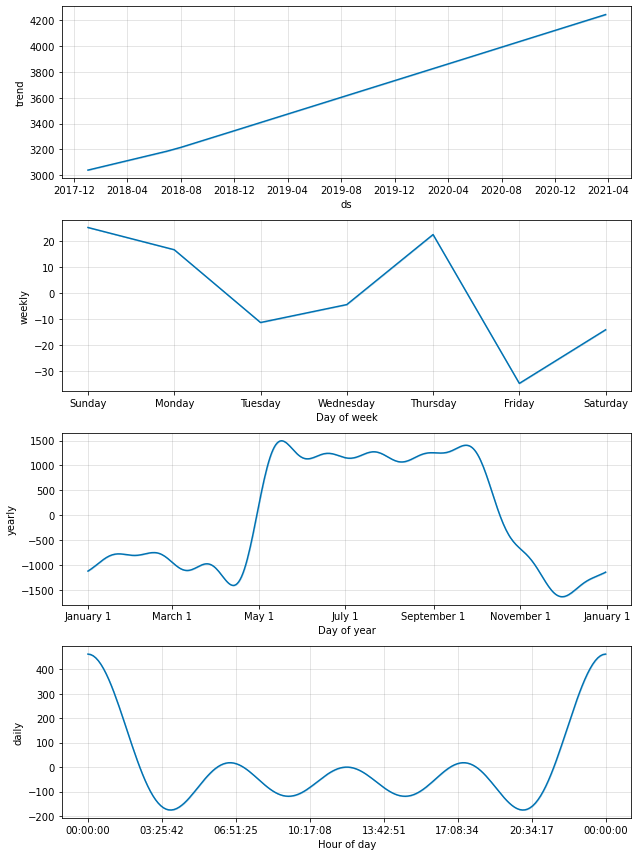

In [17]:
plot2 = m.plot_components(forecast)